## Freeze sender/receiver

This notebook will take care of the analysis regarding the freezing of either the sender or the receiver.

The reason we want to freeze the sender is to make the messages constant. We can then initialize different receivers and see how they react to an environment that remains constant. RSA is measured for the hidden states (recreation of feature vector from message) of the receivers. Should RSA be high, language has a somewhat similar purpose/meaning across different seeds. Should RSA be low, language has no straightforward meaning for different seeds.

We can freeze the receiver to see whether sender come up with similar languages.

In [35]:
import glob
import pickle
from metrics import *
import matplotlib.pyplot as plt
from scipy import spatial
from data import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Freeze sender

In [36]:
# load models/metrics

def load_metrics(path):
    """
        This function loads metrics
    """

    # load the data
    seed_folders = glob.glob(f"{path}/*")

    # save results
    result = {}

    # run through all seed
    for s in seed_folders:
        
        # get seed index
        seed = s.split("/")[-1]

        # dictionary for every seed
        result[seed] = {}
        
        # make sure to ignore the rsa analysis for now
        if seed == 'rsa_analysis.pkl':
            continue

        # get all metric files
        metric_files = glob.glob(s + "/*.pkl")

        for file in metric_files:
            
            # get seed index
            iteration = file.split("_")[-1].strip('.pkl')

            # load files
            m1 = pickle.load(open(file, "rb"))

            result[seed][iteration] = m1
           

    return result



In [107]:
# get the path
path = "runs/lstm_max_len_10_vocab_25_attr_5_split_2/4/freezes_receiver"

result = load_metrics(path)


# Check if messages are the same

In [109]:
for key, value in result.items():
    for a, metric in value.items():
        #if a == '0':
        #    print(metric['messages'])
        #    print()
        if a == '10000':
            print(metric['messages'])

    

[[26 10 10 ... 23 23 23]
 [26 10 10 ... 10 10 12]
 [26 10 10 ... 15 15 15]
 ...
 [26  5 23 ...  0 12 12]
 [26  5  5 ...  4  4  0]
 [26 20 23 ... 12 12 12]]
[[26 12 12 ... 23 10 23]
 [26 10 10 ... 10 10 10]
 [26 12 12 ... 10 15 15]
 ...
 [26 21 23 ...  6 12 12]
 [26  5 23 ...  4  0  0]
 [26 21 23 ... 12 12 12]]
[[26 12 12 ... 23 23 23]
 [26 10 10 ... 10 10 10]
 [26 10 10 ... 15 15 15]
 ...
 [26  4  4 ...  0  0 12]
 [26  0  0 ...  4  4  4]
 [26 23 23 ... 12 12 12]]
[[26 10 10 ... 23  4  4]
 [26 10 10 ... 10 10 10]
 [26 10 10 ...  4 15 10]
 ...
 [26  5 23 ... 12 12  3]
 [26  5  5 ...  4  4  0]
 [26 23  4 ...  3 12 12]]
[[26 12 12 ... 23 23  0]
 [26 10 10 ... 10 10 10]
 [26 10 10 ... 10 10 10]
 ...
 [26 21 23 ... 11 12 12]
 [26  0 11 ...  5  5  5]
 [26 14 23 ... 12 12 12]]
[[26 10 10 ... 23 23  0]
 [26 10 10 ... 10 10 10]
 [26 10 10 ... 15 10 10]
 ...
 [26  0 23 ...  0 12 12]
 [26  0 11 ...  5  5  5]
 [26 23 23 ... 12 12 11]]
[[26 12 10 ... 23 23 23]
 [26 10 10 ... 10 10 10]
 [26 12 10 ...

In [110]:
def plot_rsa_metric(results, metric, ylabel=None, show_error=True, 
                    savefig=True, figname=None, title=None, ylim=None, a4_dims=(11.7, 8.27), show=True):
    
    # initialize plots
    ci = 'sd' if show_error else None
    fig, ax = plt.subplots(figsize=a4_dims)
    
    # get data to fill up plot
    all_values = []
    for result in results.values():

        generations = []
        values = []
        run_names = []
        
        for s in list(result[metric].keys()):  
            
            # check if list is not empty
            if not list(result[metric][s].keys()):
                continue

            for g in list(result[metric][s].keys()):
                if type(g) != int:
                    continue
                generations.append(g)
                values.append(result[metric][s][g])
                run_names.append(metric)

        values = np.array(values)
        iterations = np.array(generations)   
        all_values.append(values)
    
    # initialize data dictionary
    d = {'Iterations': iterations}
        
    # fill dictionary with rest of data
    for i, key in enumerate(results.keys()):
        d[key] = all_values[i]    
    data_preproc=pd.DataFrame(data=d)

    ax = sns.lineplot(x='Iterations', y="RSA", 
                      data=pd.melt(data_preproc, ['Iterations'],
                                   var_name='method',
                                   value_name="RSA"))

    if title is None:
        title = metric.replace('_', ' ').title()
    ax.set_title(title, fontsize=30)

    plt.show()


# Freeze Sender

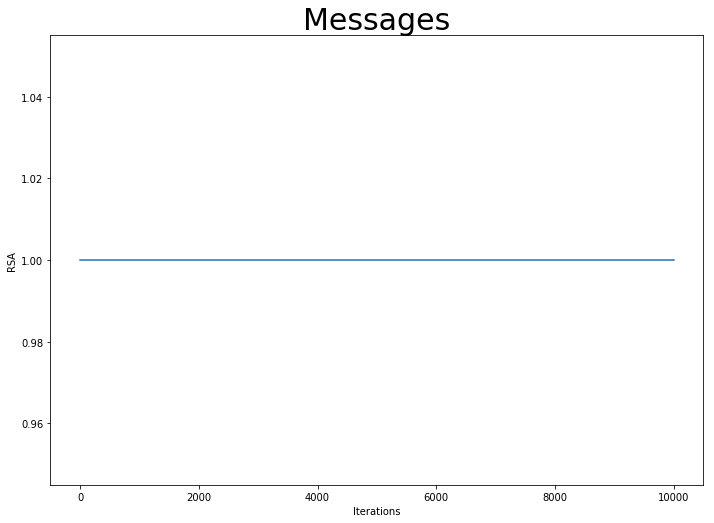

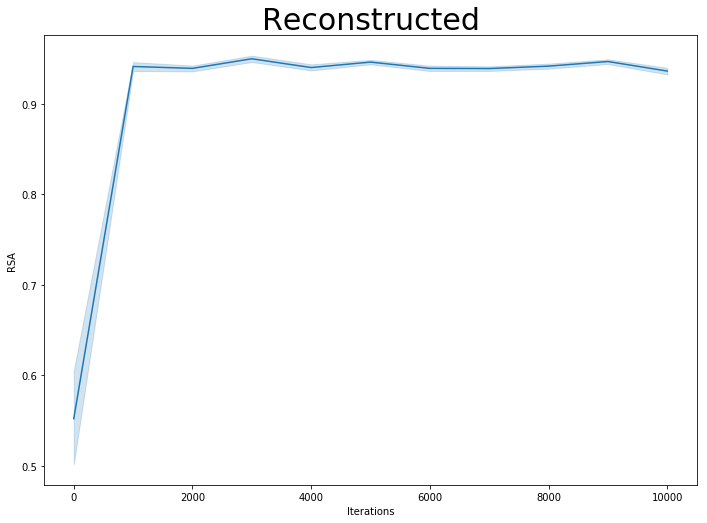

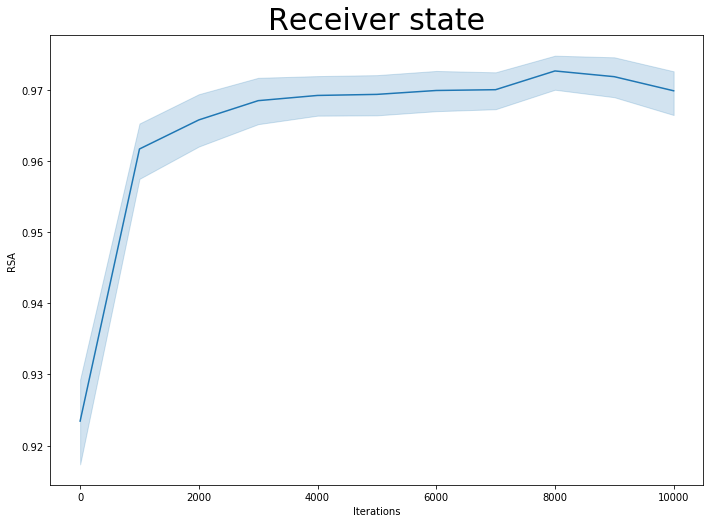

In [117]:
path = "runs/lstm_max_len_10_vocab_25_attr_5_split_2/4/freezes_sender"
RSA_BASELINE = pickle.load(open(f'{path}/rsa_analysis.pkl', 'rb'))

#print(RSA_BASELINE['h_receiver'])
RSA_ANALYSIS = {'baseline': RSA_BASELINE}

plot_rsa_metric(RSA_ANALYSIS, metric='ham_messages', title="Messages")
plot_rsa_metric(RSA_ANALYSIS, metric='h_receiver', title="Reconstructed")

plot_rsa_metric(RSA_ANALYSIS, metric='h_rnn_receiver', title="Receiver state")

# Freeze Receiver

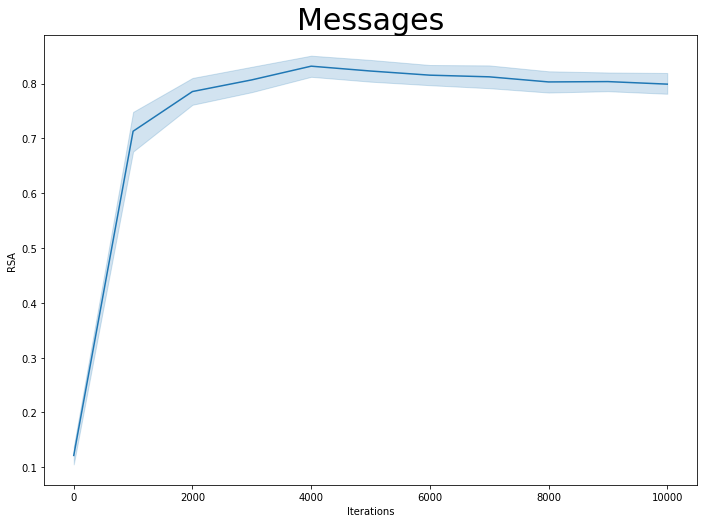

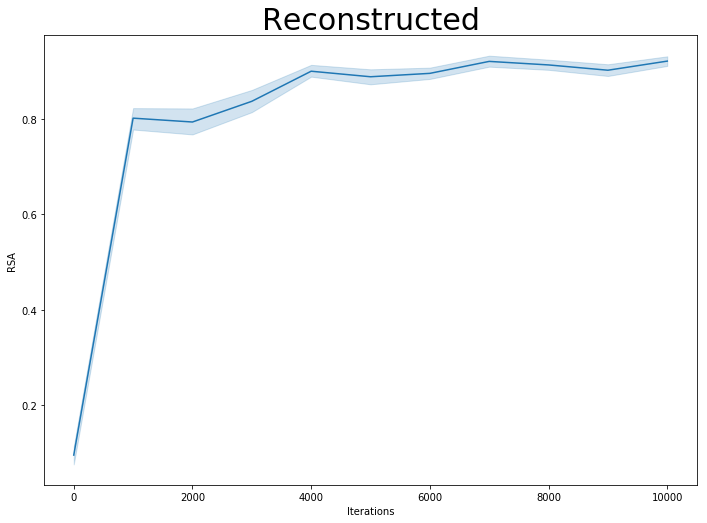

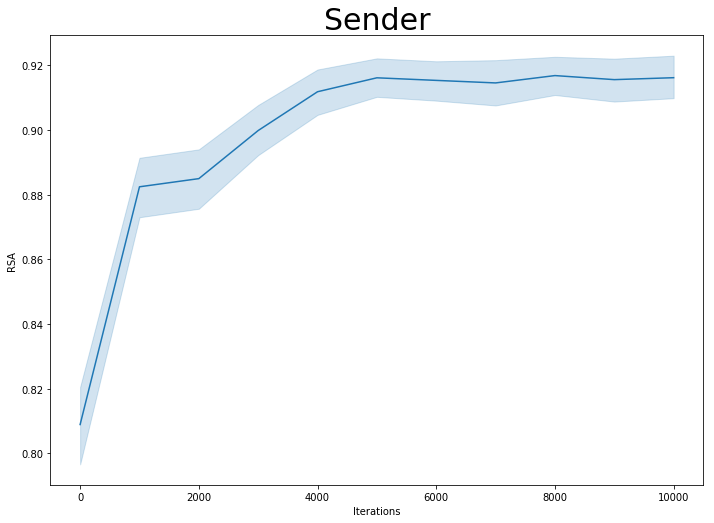

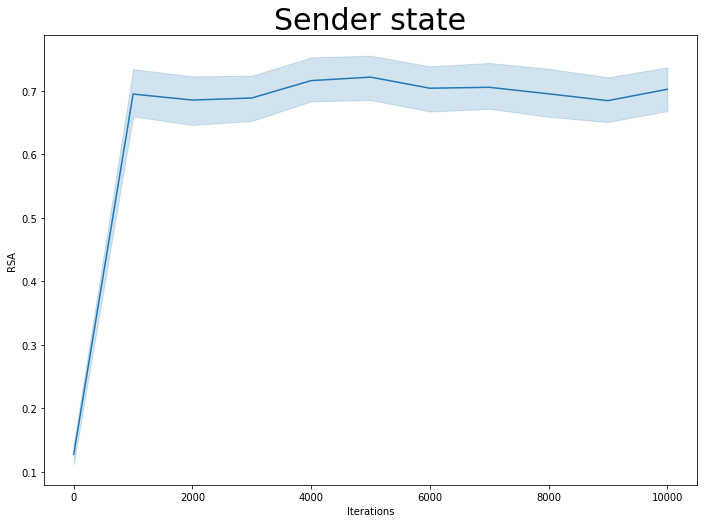

In [114]:
path = "runs/lstm_max_len_10_vocab_25_attr_5_split_2/4/freezes_receiver"
RSA_BASELINE = pickle.load(open(f'{path}/rsa_analysis.pkl', 'rb'))

#print(RSA_BASELINE['h_receiver'])
RSA_ANALYSIS = {'baseline': RSA_BASELINE}

plot_rsa_metric(RSA_ANALYSIS, metric='ham_messages', title="Messages")
plot_rsa_metric(RSA_ANALYSIS, metric='h_receiver', title="Reconstructed")
plot_rsa_metric(RSA_ANALYSIS, metric='h_sender', title="Sender")

plot_rsa_metric(RSA_ANALYSIS, metric='h_rnn_sender', title="Sender state")

# RSA run

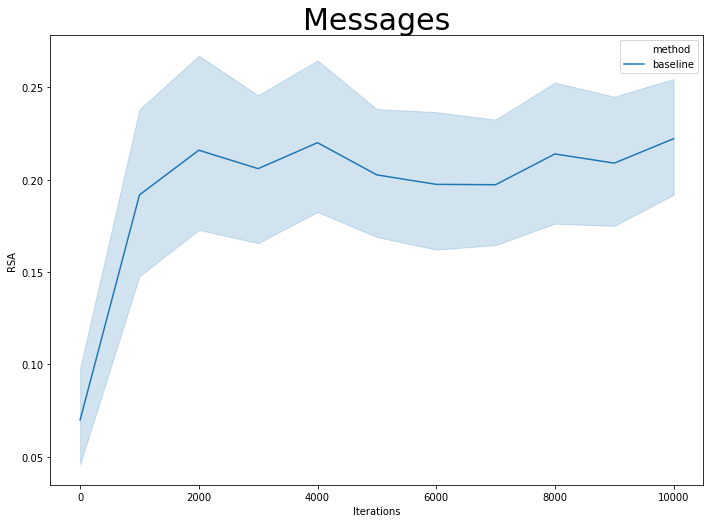

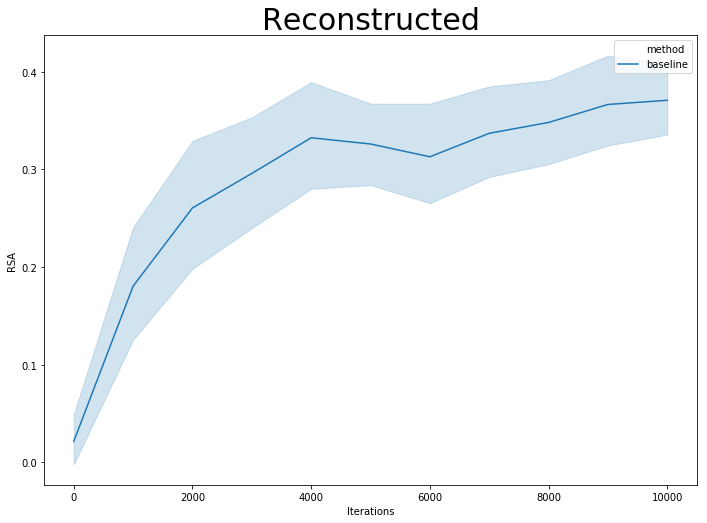

In [83]:
path = "runs/lstm_max_len_10_vocab_25_attr_5_split_2/"
RSA_BASELINE = pickle.load(open(f'{path}/rsa_analysis.pkl', 'rb'))

#print(RSA_BASELINE['h_receiver'])
RSA_ANALYSIS = {'baseline': RSA_BASELINE}

plot_rsa_metric(RSA_ANALYSIS, metric='ham_messages', title="Messages")
plot_rsa_metric(RSA_ANALYSIS, metric='h_receiver', title="Reconstructed")